<a href="https://colab.research.google.com/github/SusmitWani/Sign-Language-Detection-MNIST/blob/master/SignLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        lines = training_file.readlines()[1:]
        labels = np.zeros(len(lines))
        images = np.zeros([len(lines), 28, 28])
        for i, x in enumerate(lines):
            x = x.strip().split(',')
            labels[i] = int(x[0])
            images[i, :, :] = np.array_split(x[1:785], 28)
    return images, labels

path_sign_mnist_train = f"/content/drive/My Drive/Sign Language Classifier/sign_mnist_train/sign_mnist_train.csv"
path_sign_mnist_test = f"/content/drive/My Drive/Sign Language Classifier/sign_mnist_test/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                  shear_range=0.3,
                                  zoom_range=0.2,
                                  fill_mode='nearest',
                                  height_shift_range=0.2,
                                  width_shift_range=0.2)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')]
    )

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the Model
callback = myCallback()
train_generator = train_datagen.flow(training_images, training_labels)
validation_generator = validation_datagen.flow(testing_images, testing_labels)
history = model.fit_generator(train_generator, epochs=20, verbose=2, validation_data = validation_generator, callbacks=[callback])

model.evaluate(testing_images, testing_labels, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
858/858 - 8s - loss: 1.7945 - accuracy: 0.4296 - val_loss: 0.6088 - val_accuracy: 0.7503
Epoch 2/20
858/858 - 8s - loss: 0.5841 - accuracy: 0.7991 - val_loss: 0.2221 - val_accuracy: 0.9268
Epoch 3/20
858/858 - 8s - loss: 0.3333 - accuracy: 0.8853 - val_loss: 0.0914 - val_accuracy: 0.9672
Epoch 4/20
858/858 - 8s - loss: 0.2332 - accuracy: 0.9218 - val_loss: 0.0405 - val_accuracy: 0.9941
Epoch 5/20
858/858 - 8s - loss: 0.1715 - accuracy: 0.9422 - val_loss: 0.0200 - val_accuracy: 0.9955
Epoch 6/20
858/858 - 8s - loss: 0.1441 - accuracy: 0.9511 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 7/20
858/858 - 8s - loss: 0.1277 - accuracy: 0.9581 - val_loss: 0.0502 - val_accuracy: 0.9810
Epoch 8/20
858/858 - 8s - loss: 0.1069 - accuracy: 0.9656 - val_loss: 0.0335 - val_accuracy: 0.9872
Epoch 9/20
858/858 - 8s - loss: 0.1018 - accuracy: 0.9678 - val_loss: 0.0063 - val_accuracy: 0.9996
Epoch 10/20

Reached 97.

[6.123782157897949, 0.9860568642616272]

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

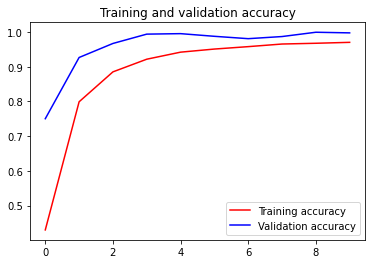

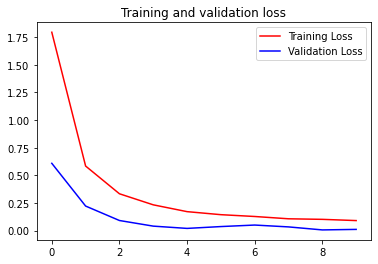

In [7]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()